# Predictive Analytics for Heart Disease - Muhammad Irfan Abidin

Proyek ini bertujuan untuk membangun model analitik prediktif yang dapat mendeteksi risiko penyakit jantung berdasarkan berbagai fitur yang tersedia dalam dataset.

## Data Loading
Data Loading adalah tahap awal dalam proses analisis data untuk memuat dataset ke dalam lingkungan pemrograman

### library

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np


### import dataset
Dataset diambil dari kaggle yang sudah disimpan di Google Drive, kemudian dimuat ke dalam DataFrame menggunakan Pandas.

In [205]:
heart = pd.read_csv('https://drive.google.com/uc?export=download&id=1yiTBiaD0GlsrBCNf0DTU9__EIImqoZz5')
heart

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


## Exploratory Data Analysis
Tahap ini bertujuan untuk memahami data lebih dalam sebelum melakukan pemodelan. Dengan melakukan beberapa analisis sebagai berikut:

### Deskripsi Variabel

In [206]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   



*   Terdapat 8 kolom dengan tipe object
*   Terdapat 8 kolom dengan tipe int64



In [207]:
heart.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


### Missing Value
Dataset dicek untuk nilai yang hilang. Setelah itu, semua baris dengan nilai kosong dihapus untuk memastikan kualitas data.

In [208]:
heart.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


Terdapat missing value untuk kolom Alcohol Intake sebanyak 340 baris, maka harus dihapus

In [209]:
heart.dropna(inplace=True)

In [210]:
heart.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,0
Exercise Hours,0
Family History,0
Diabetes,0


### Outliers
Outlier pada fitur numerik diidentifikasi menggunakan boxplot untuk memastikan distribusi data yang normal

In [211]:
numerical_features = [
    'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar', 'Heart Disease'
]


categorical_features = [
    'Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type'
]

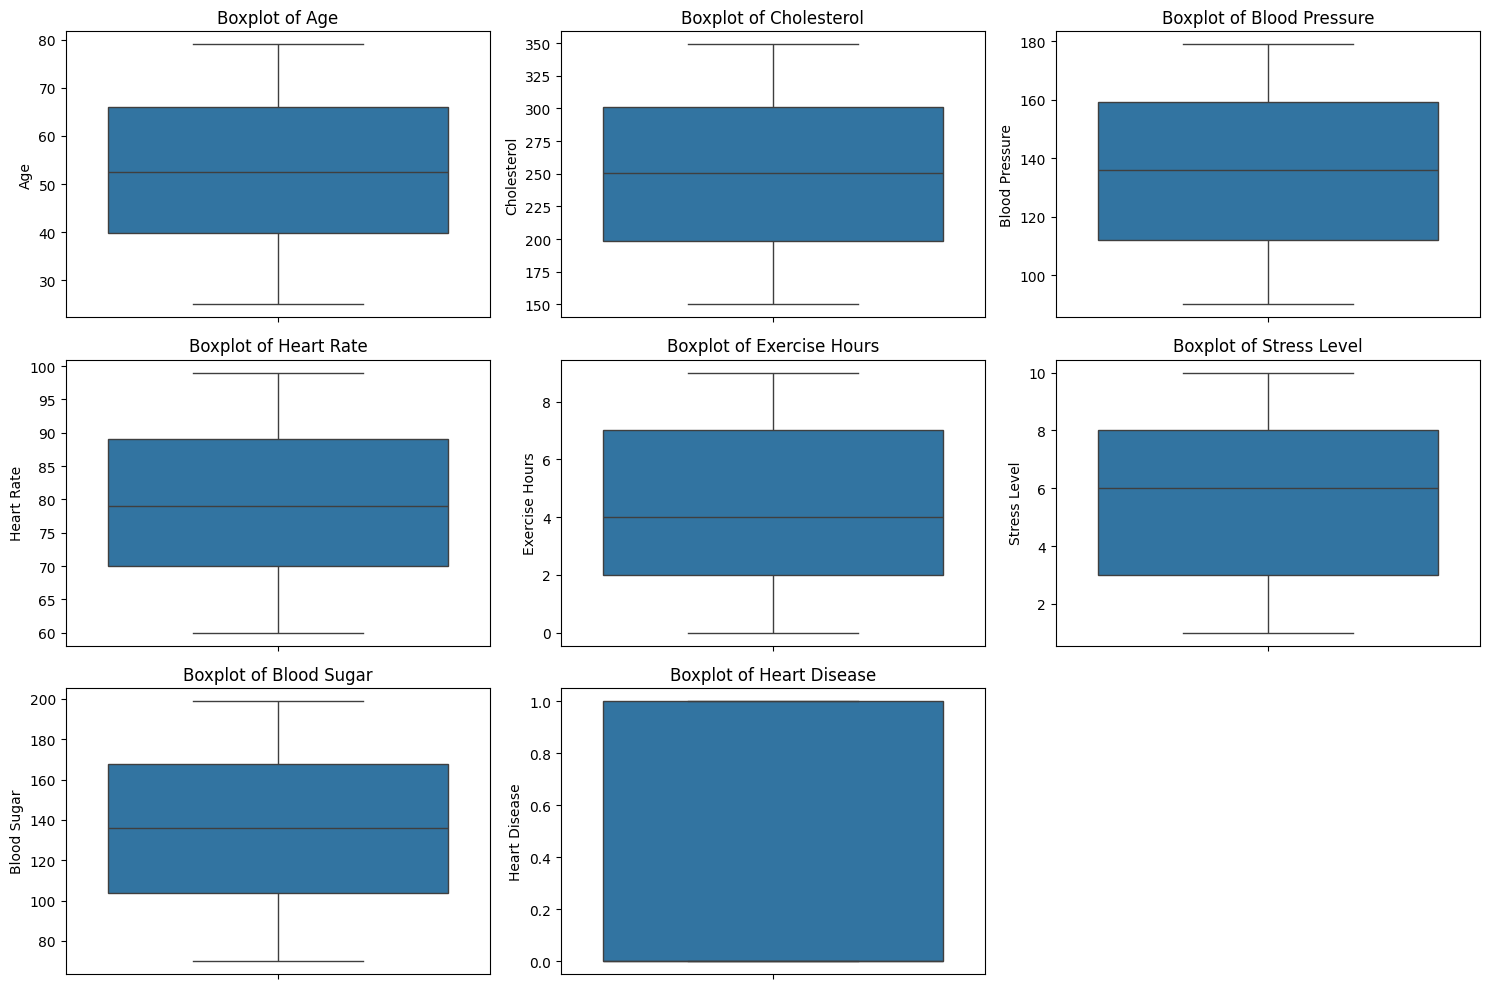

In [212]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=heart, y=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas, data terlihat normal tanpa adanya outlier

### Univariate Analysis
Analisis distribusi dilakukan untuk setiap fitur, baik numerik maupun kategorikal. Visualisasi seperti histogram dan bar chart digunakan untuk membantu memahami distribusi data.

#### Categorical Features

        jumlah sampel  persentase
Gender                           
Male              345        52.3
Female            315        47.7


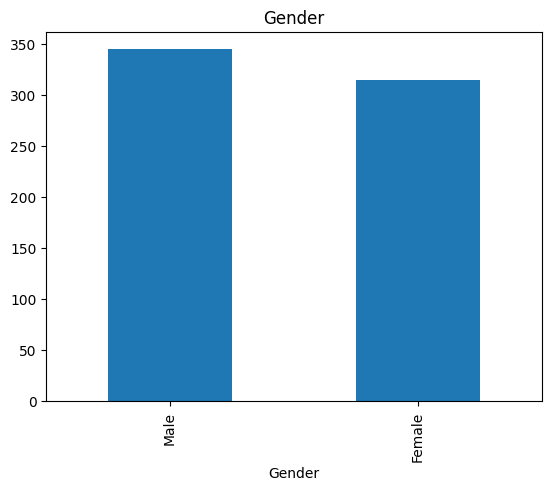

In [213]:
feature = categorical_features[0]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


Berdasarkan hasil diatas jumlah male lebih banyak dibandingkan female

         jumlah sampel  persentase
Smoking                           
Never              225        34.1
Current            219        33.2
Former             216        32.7


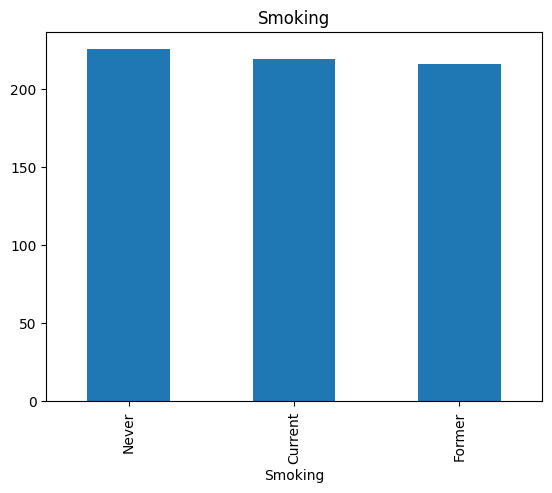

In [214]:
feature = categorical_features[1]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


Berdasarkan hasil diatas kategori never, current, dan former tampak memiliki jumlah yang relatif seimbang, dengan sedikit perbedaan

                jumlah sampel  persentase
Alcohol Intake                           
Heavy                     346        52.4
Moderate                  314        47.6


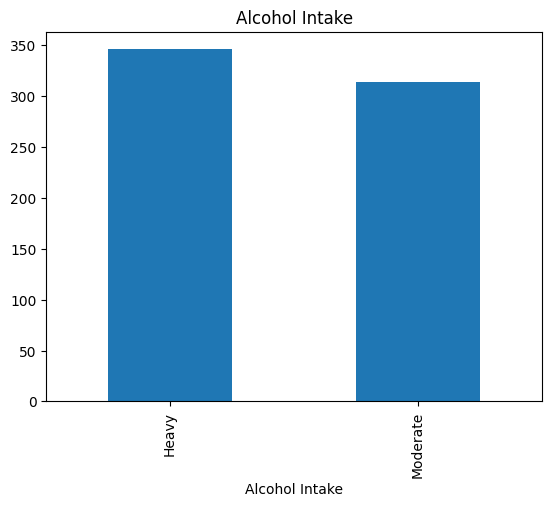

In [215]:
feature = categorical_features[2]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


Berdasarakn hasil diatas kategori Heavy lebih banyak dibandingkan moderate

                jumlah sampel  persentase
Family History                           
No                        330        50.0
Yes                       330        50.0


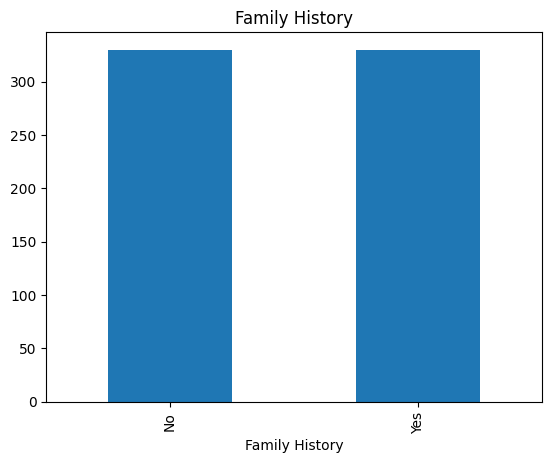

In [216]:
feature = categorical_features[3]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


Berdasarkan hasil diatas kedua kategori memiliki jumlah yang seimbang

          jumlah sampel  persentase
Diabetes                           
No                  332        50.3
Yes                 328        49.7


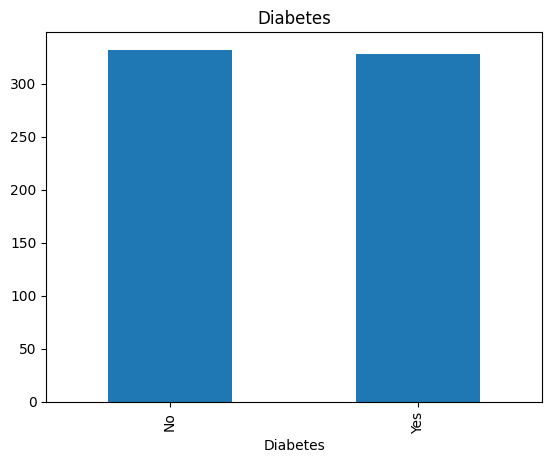

In [217]:
feature = categorical_features[4]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


Berdasrkan hasil diatas kedua kategori memiliki jumlah yang hampir seimbang

         jumlah sampel  persentase
Obesity                           
Yes                349        52.9
No                 311        47.1


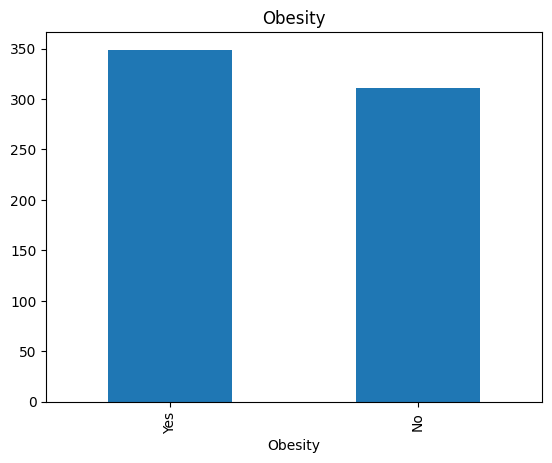

In [218]:
feature = categorical_features[5]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


                         jumlah sampel  persentase
Exercise Induced Angina                           
No                                 360        54.5
Yes                                300        45.5


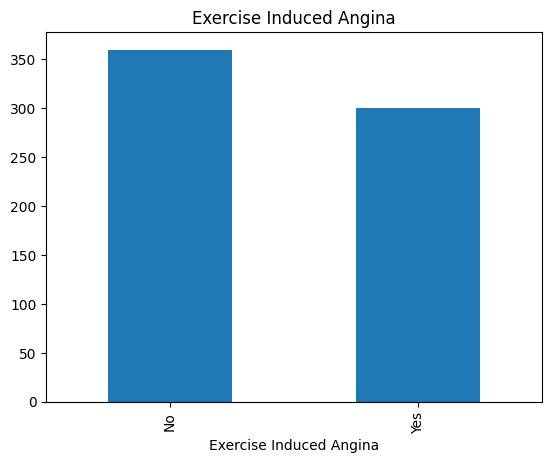

In [219]:
feature = categorical_features[6]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


                  jumlah sampel  persentase
Chest Pain Type                            
Non-anginal Pain            175        26.5
Asymptomatic                171        25.9
Typical Angina              161        24.4
Atypical Angina             153        23.2


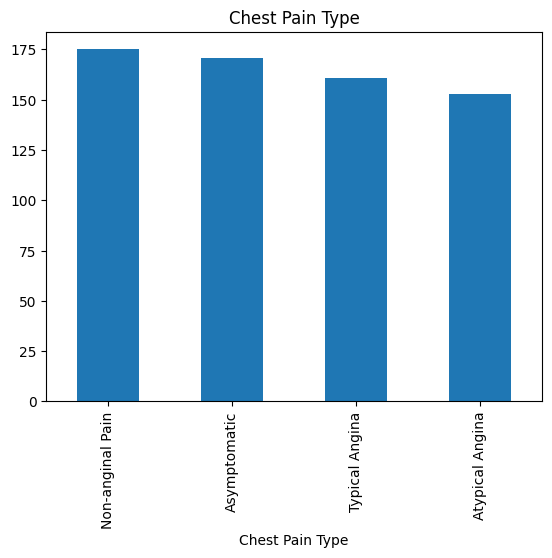

In [220]:
feature = categorical_features[7]
count = heart[feature].value_counts()
percent = 100 * heart[feature].value_counts(normalize=True)
result = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(result)
count.plot(kind='bar', title=feature)
plt.show()


Berdasarkan hasil diatas urutan nyeri dada yang paling banyak adalah Non-anginal pain, Asymptomatic, Typical Angina, Aypical Angina.

#### Numerical Features

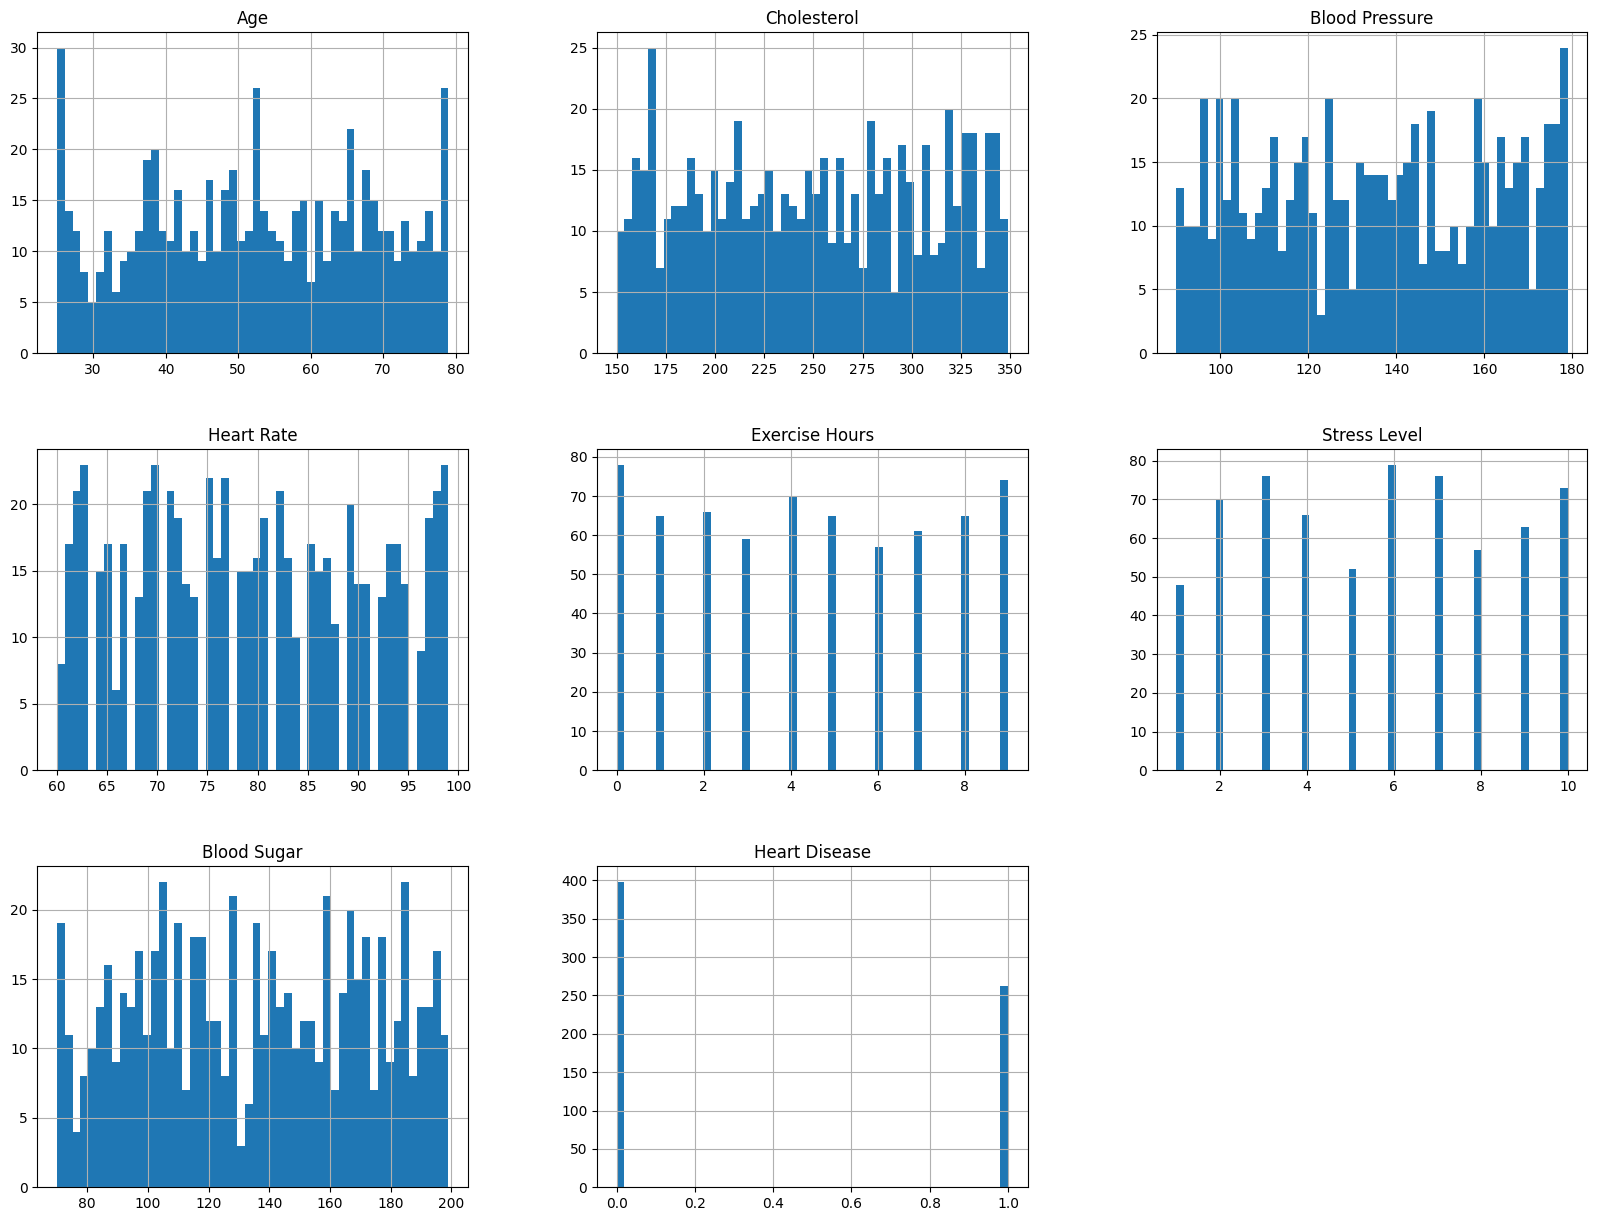

In [221]:
heart.hist(bins=50, figsize=(20,15))
plt.show()

- Analisis univariate menunjukkan bahwa fitur seperti **Age**, **Cholesterol**, dan **Blood Pressure** berpotensi memiliki hubungan dengan penyakit jantung.
- Distribusi target memperlihatkan ketidakseimbangan data, di mana lebih banyak pasien yang tidak memiliki penyakit jantung (nilai `0`). Oleh karena itu, diperlukan teknik penyeimbangan data seperti oversampling atau undersampling untuk meningkatkan akurasi model pada kelas minoritas (nilai `1`).

### Multivariate Analysis

#### Categorical Features

<ipython-input-222-aba86047afe2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Heart Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=heart, palette="Set3")
<ipython-input-222-aba86047afe2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Heart Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=heart, palette="Set3")
<ipython-input-222-aba86047afe2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Heart Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=heart, palet

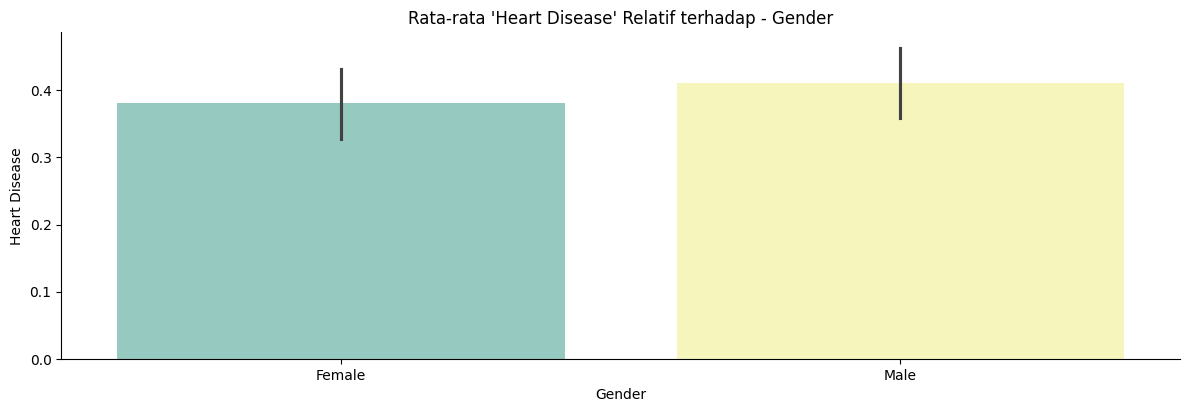

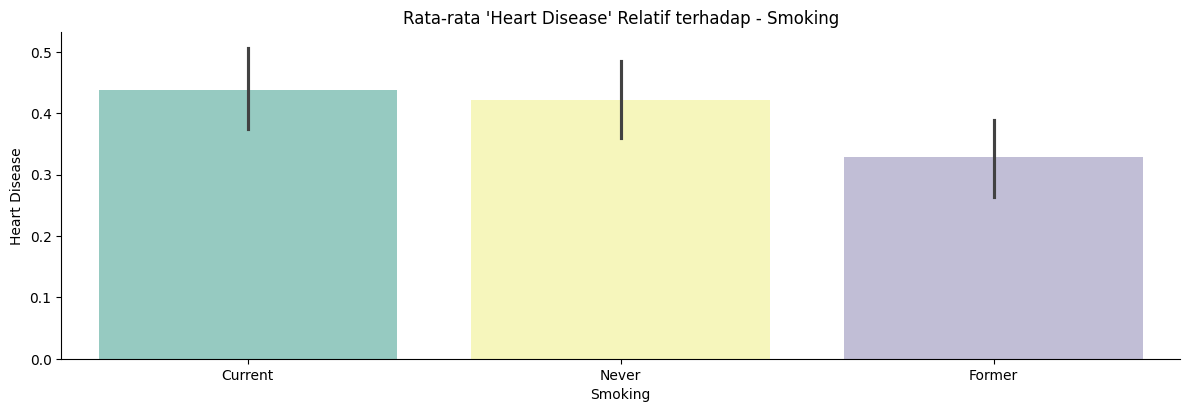

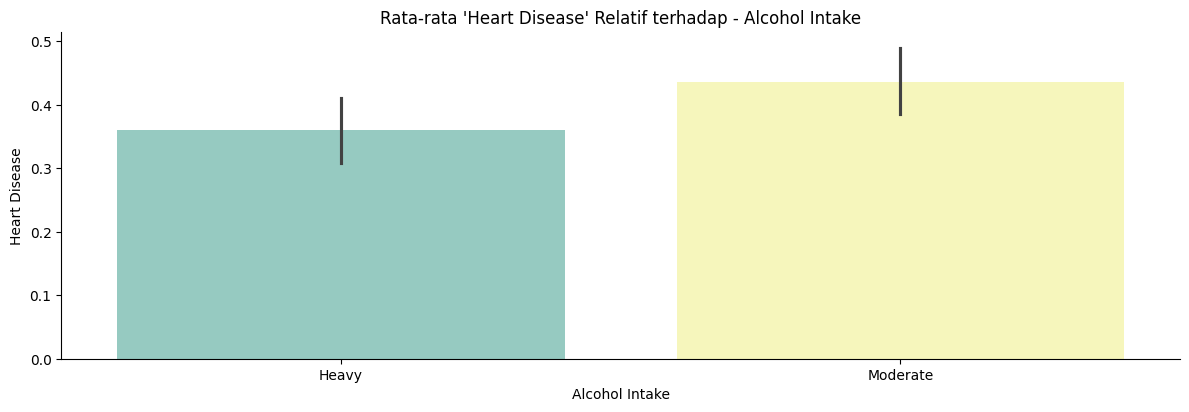

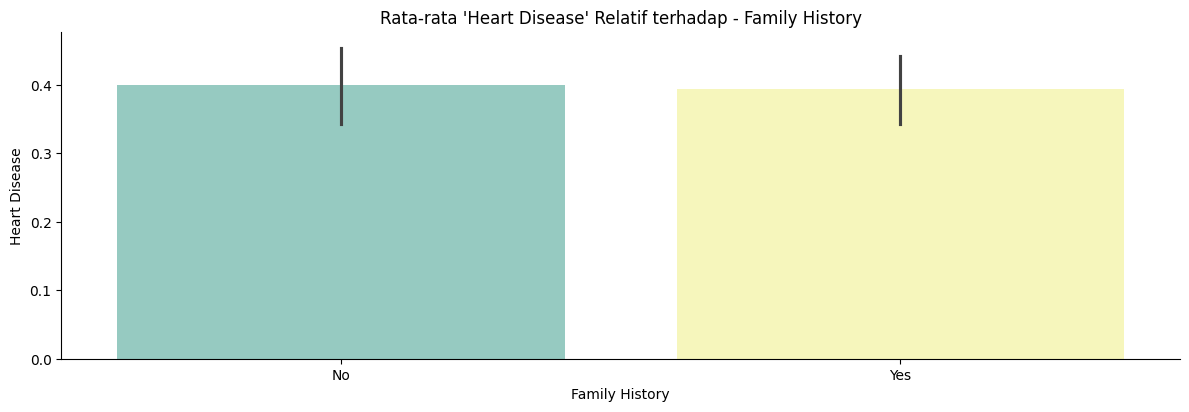

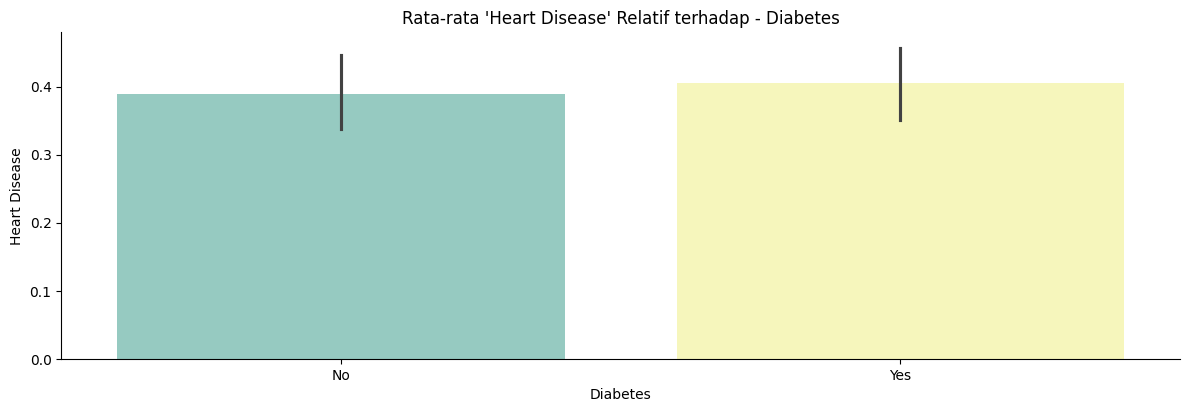

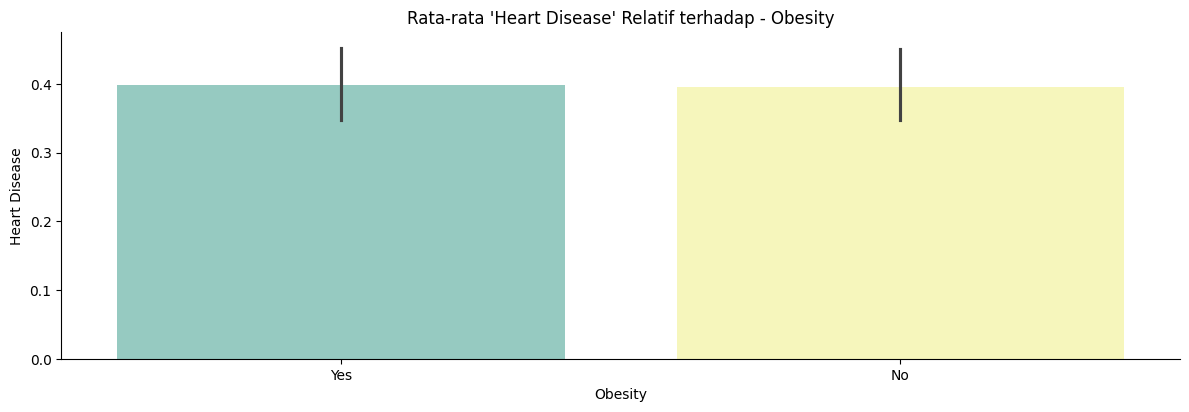

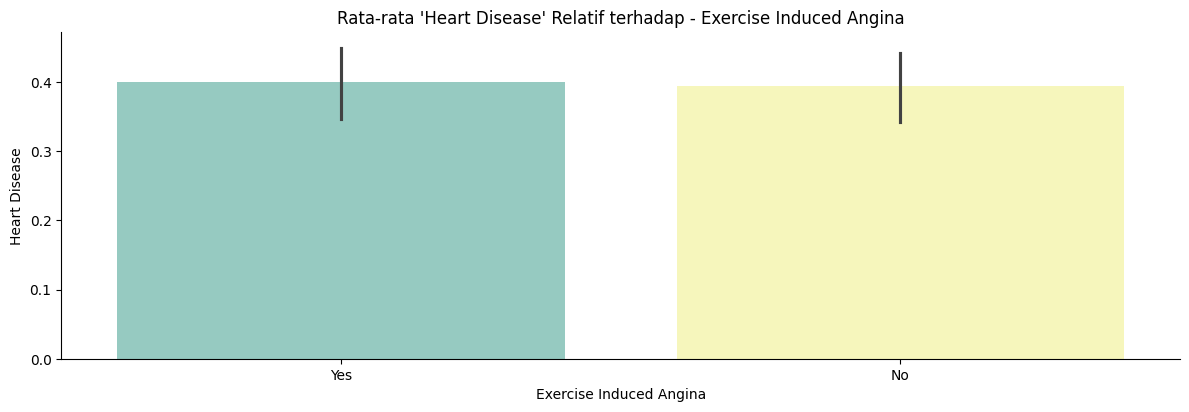

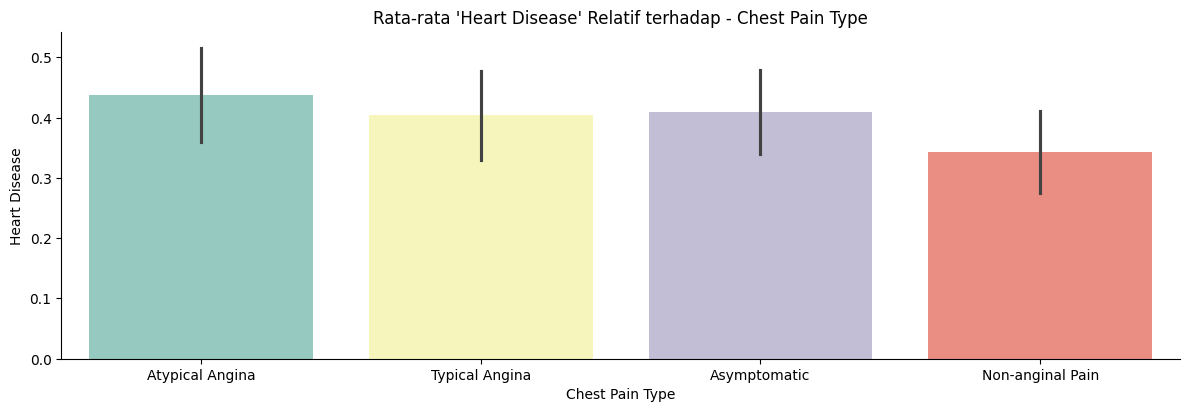

In [222]:
cat_features = heart.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Heart Disease", kind="bar", dodge=False, height = 4, aspect = 3,  data=heart, palette="Set3")
  plt.title("Rata-rata 'Heart Disease' Relatif terhadap - {}".format(col))

- Beberapa fitur kategorikal seperti **Gender**, **Alcohol Intake**, **Family History**, **Diabetes**, **Obesity**, dan **Exercise Induced Angina** menunjukkan pengaruh yang relatif rendah terhadap penyakit jantung, karena distribusi risiko antar kategori cenderung serupa.
- **Smoking** memiliki pengaruh sedang terhadap risiko penyakit jantung, di mana perokok aktif lebih rentan terkena penyakit jantung.
- **Chest Pain Type** merupakan fitur yang paling signifikan, dengan variasi risiko yang jelas antar kategori nyeri dada terhadap penyakit jantung.

#### Numerical Features

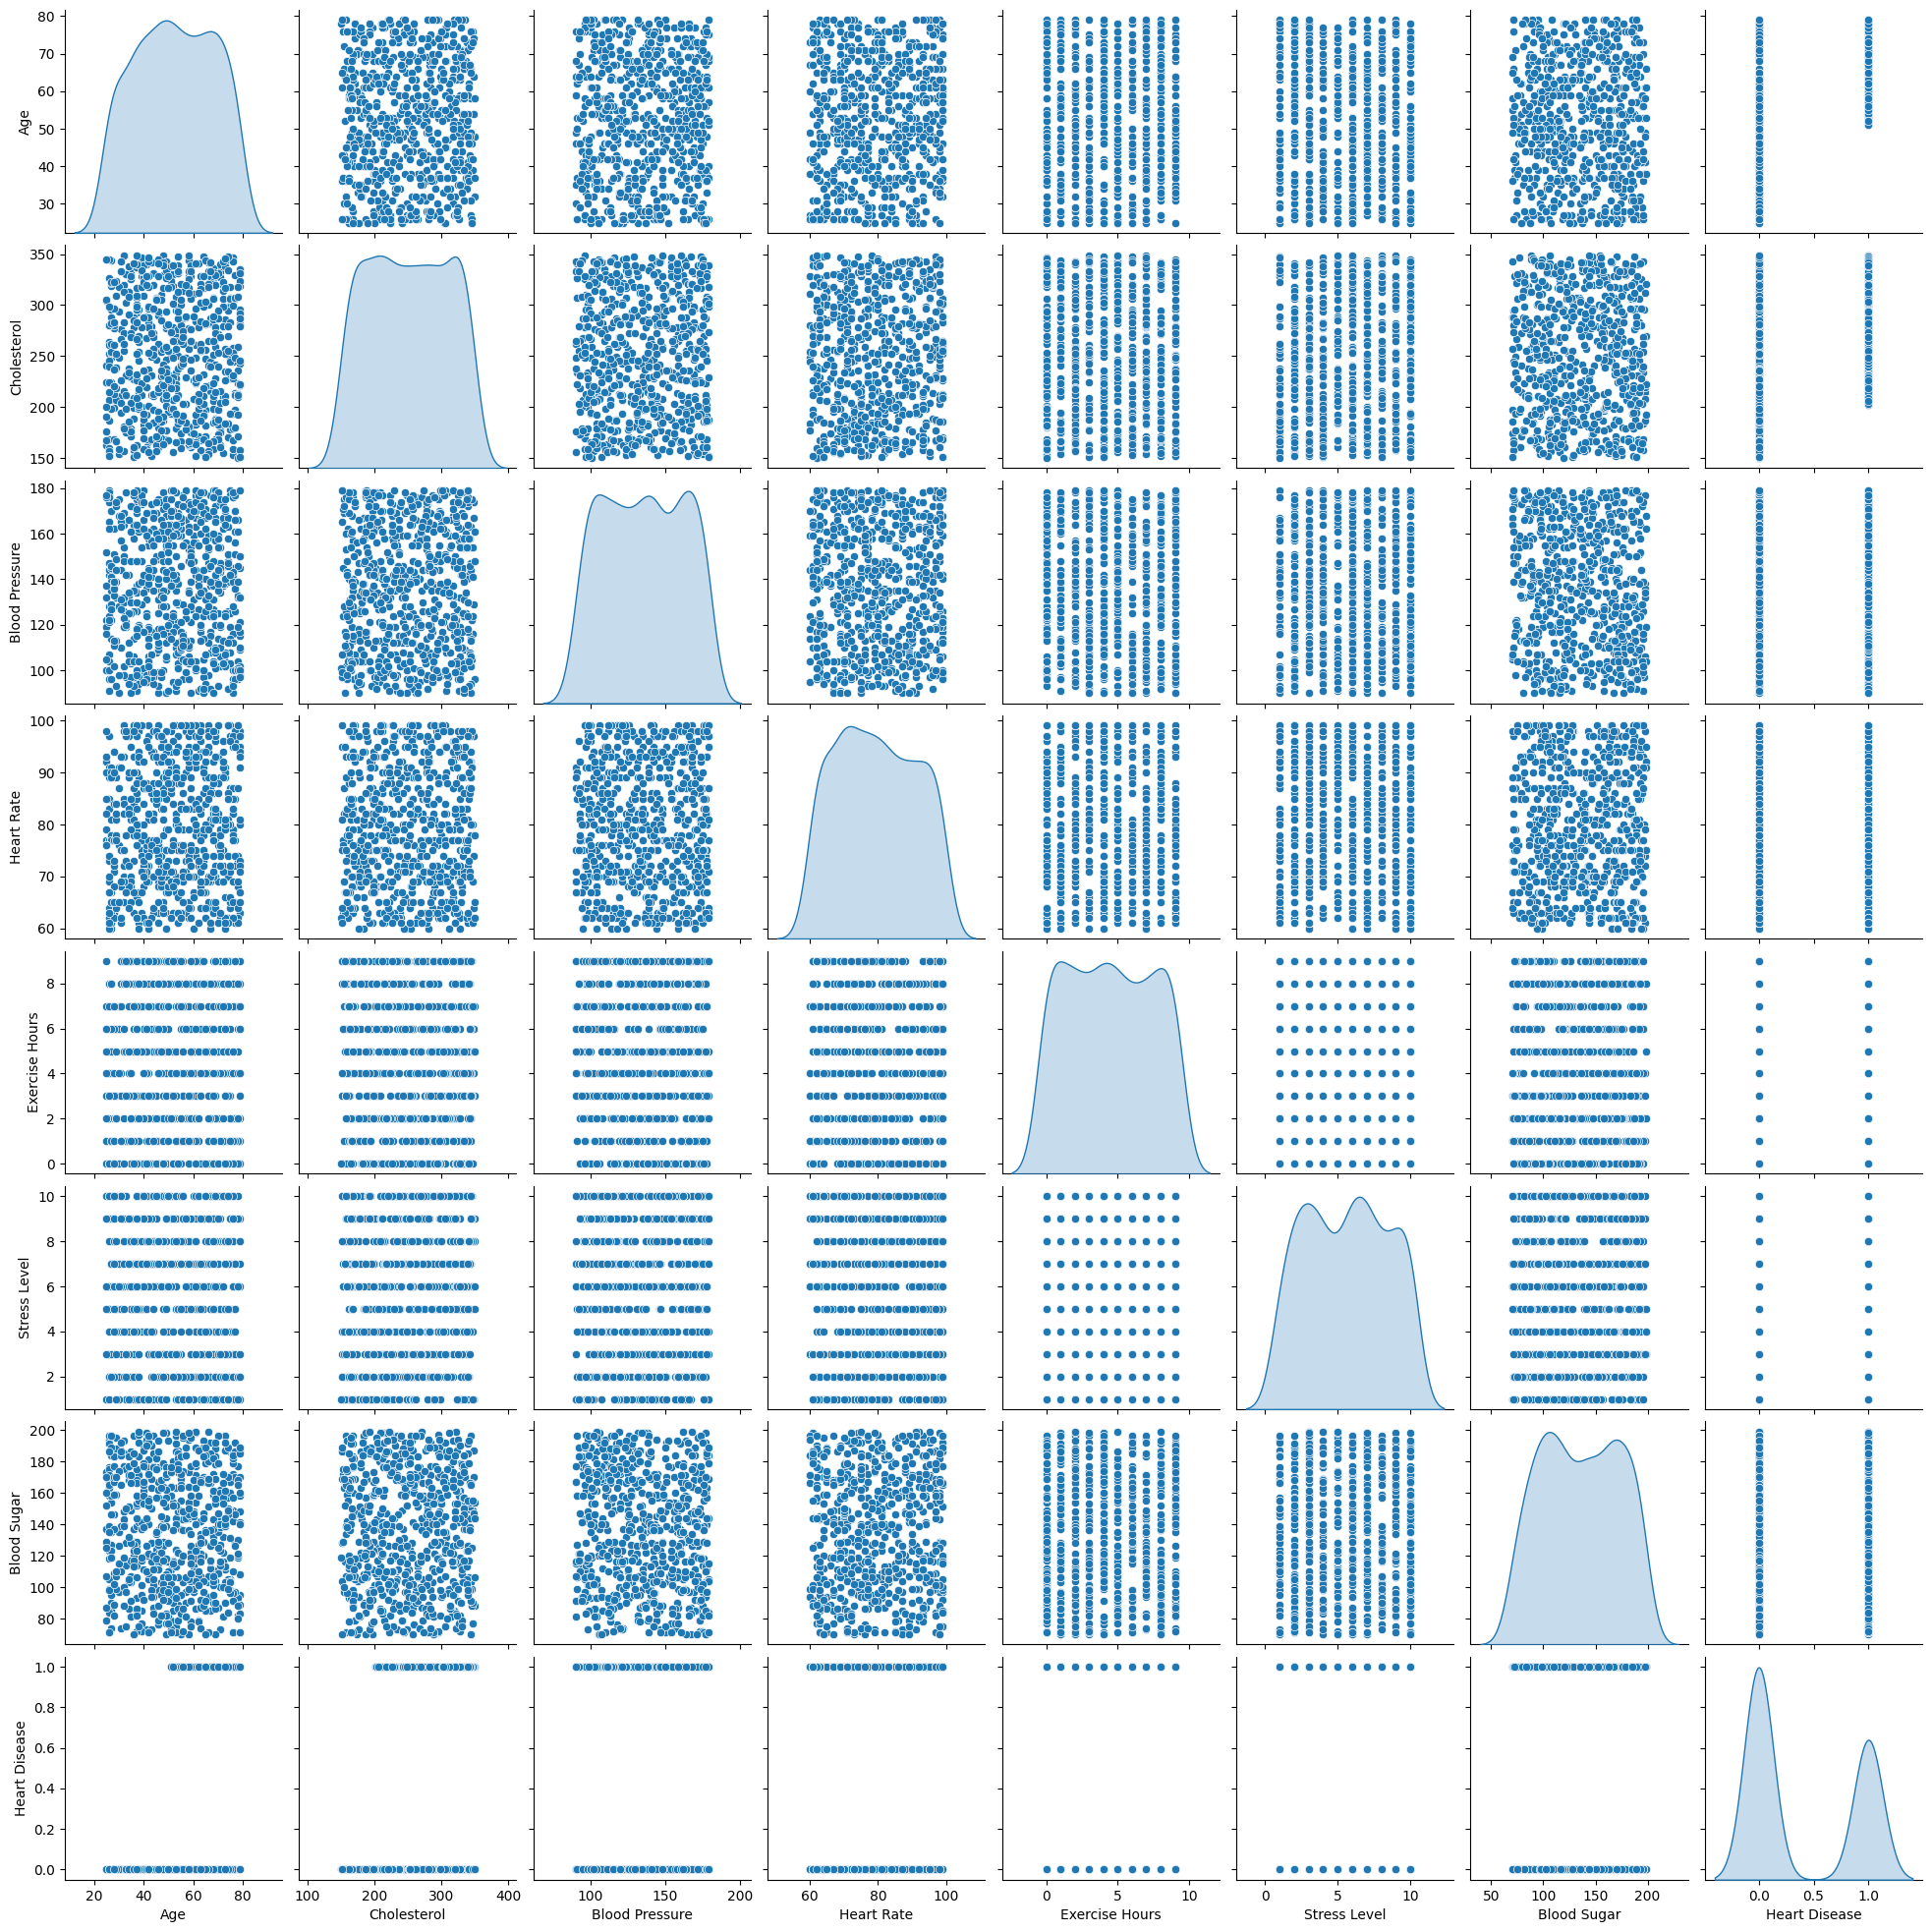

In [223]:
sns.pairplot(heart, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

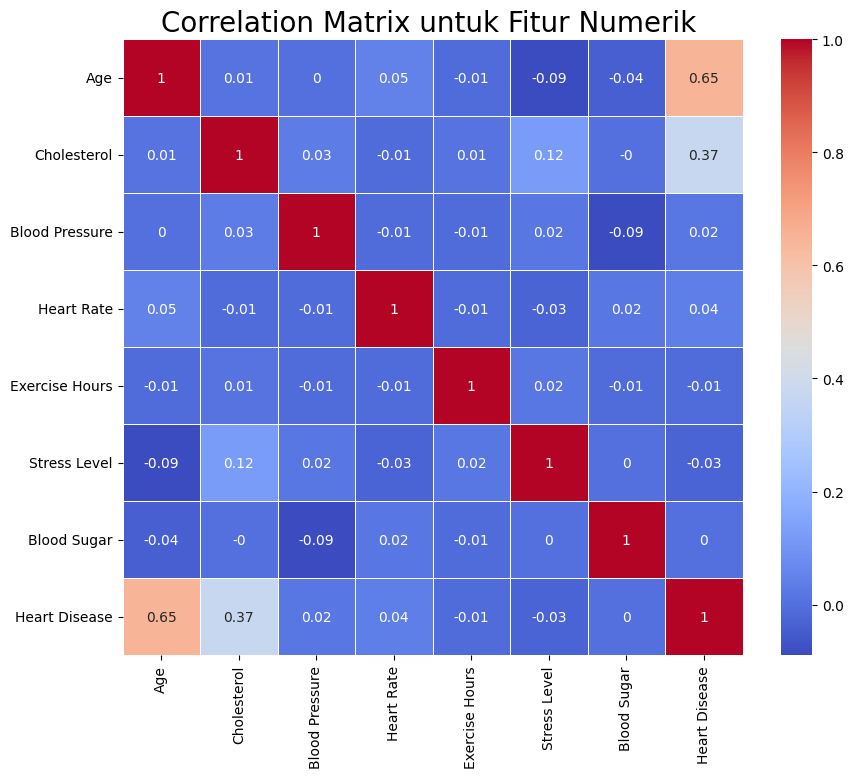

In [224]:
plt.figure(figsize=(10, 8))
correlation_matrix = heart[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)



*   Fitur **Age** memiliki skor korelasi yang cukup tinggi (0.65) dengan fitur target **Heart Disease**. Ini menunjukkan bahwa semakin tua seseorang, semakin tinggi kemungkinan menderita penyakit jantung.

*   Fitur **Cholesterol** juga memiliki korelasi positif moderat (0.37) dengan Heart Disease, sehingga kolesterol dapat menjadi faktor penting dalam memprediksi penyakit jantung.

*   Sebaliknya, fitur seperti **Blood Pressure**, **Exercise Hours**, dan **Stress Level** memiliki korelasi yang sangat kecil terhadap **Heart Disease** (mendekati 0). Dengan demikian, fitur-fitur tersebut mungkin kurang berkontribusi signifikan dalam model prediksi dan dapat dipertimbangkan untuk di-drop.





## Data Preparation
Pada tahapan ini  data dipersiapkan untuk digunakan dalam pemodelan Machine Learning. Tahap ini mencakup pembersihan data, transformasi data, encoding fitur kategorikal, penanganan ketidakseimbangan data, dan standarisasi fitur numerik.

### Menghapus Fitur
Beberapa fitur dengan korelasi rendah terhadap target dihapus untuk mengurangi kompleksitas model.

In [225]:
low_correlation_features = ['Exercise Hours', 'Stress Level', 'Blood Sugar']
heart.drop(columns=low_correlation_features, inplace=True)

In [226]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 997
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      660 non-null    int64 
 1   Gender                   660 non-null    object
 2   Cholesterol              660 non-null    int64 
 3   Blood Pressure           660 non-null    int64 
 4   Heart Rate               660 non-null    int64 
 5   Smoking                  660 non-null    object
 6   Alcohol Intake           660 non-null    object
 7   Family History           660 non-null    object
 8   Diabetes                 660 non-null    object
 9   Obesity                  660 non-null    object
 10  Exercise Induced Angina  660 non-null    object
 11  Chest Pain Type          660 non-null    object
 12  Heart Disease            660 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 72.2+ KB


### Encoding Fitur Kategorikal
Fitur kategorikal diubah menjadi format numerik menggunakan teknik one-hot encoding.

In [227]:
numerical_features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']

heart = pd.get_dummies(heart, columns=categorical_features, drop_first=True, dtype='int')
heart

,Age,Cholesterol,Blood Pressure,Heart Rate,Heart Disease,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,228,119,66,1,0,0,0,0,0,0,1,1,1,0,0
2,53,234,91,67,1,1,0,1,0,1,0,1,1,1,0,0
6,64,211,105,86,1,0,1,0,0,1,1,1,0,0,0,1
7,60,208,148,83,1,0,0,1,1,0,1,1,1,0,0,0
8,37,317,137,66,0,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,26,215,100,74,0,0,0,1,0,0,1,0,0,1,0,0
992,28,220,102,73,0,0,0,0,1,1,1,1,0,0,0,1
994,52,248,159,76,1,1,1,0,1,0,1,1,1,0,0,0
995,56,269,111,86,1,0,0,1,0,0,1,1,0,0,1,0


### Split Data ke dalam Set Pelatihan dan Pengujian
Dataset dipecah menjadi data latih (80%) dan data uji (20%) untuk memastikan evaluasi model yang valid.



In [228]:
X = heart.drop("Heart Disease", axis=1)
y = heart["Heart Disease"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 660
Total # of sample in train dataset: 528
Total # of sample in test dataset: 132


### Imbalance
Menggunakan teknik SMOTE untuk menyeimbangkan distribusi kelas, sehingga model lebih adil dalam memprediksi kelas minoritas.

In [229]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

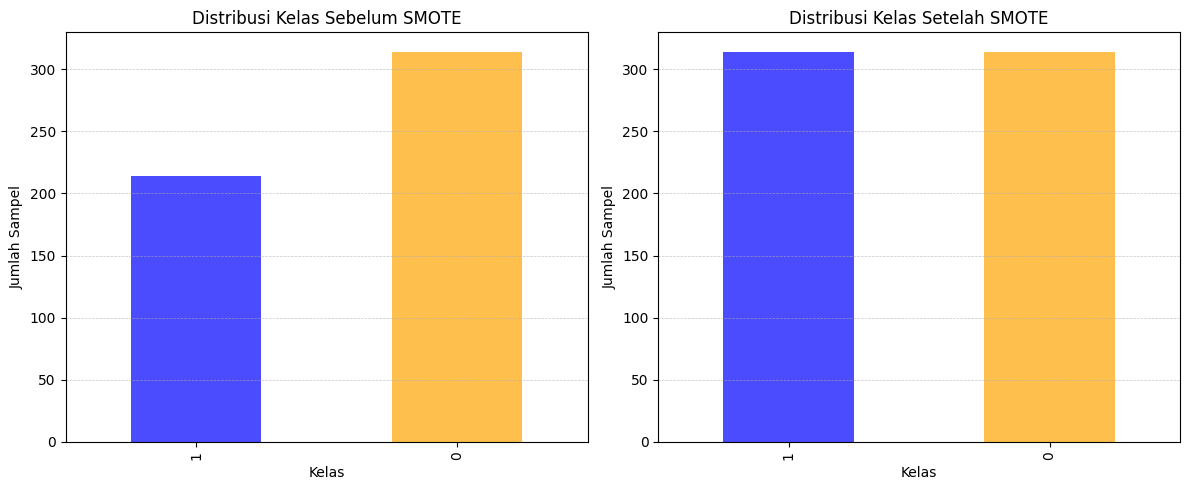

In [230]:
# Distribusi sebelum SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
y_train.value_counts(sort=False).plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Distribusi setelah SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts(sort=False).plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Sampel")
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


### Standarisasi
Fitur numerik distandarisasi agar berada pada skala yang sama, meningkatkan performa model tertentu seperti Logistic Regression.

In [231]:
scaler = StandardScaler()
X_train_resampled[numerical_features] = scaler.fit_transform(X_train_resampled[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [232]:
X_train_resampled[numerical_features].head()

,Age,Cholesterol,Blood Pressure,Heart Rate
0,1.553020,-0.733367,-0.612212,1.695542
1,1.487432,-0.715989,-1.332689,1.433362
2,-1.857566,-1.706578,1.549218,-1.101044
3,0.110080,0.396252,-1.484368,-0.926258
4,-1.136096,0.900237,-1.673968,0.909002


In [233]:
X_train_resampled[numerical_features].describe().round(4)

,Age,Cholesterol,Blood Pressure,Heart Rate
count,628.0000,628.0000,628.0000,628.0000
mean,0.0000,0.0000,0.0000,0.0000
std,1.0008,1.0008,1.0008,1.0008
min,-1.9232,-1.8282,-1.7119,-1.7128
25%,-0.8082,-0.8203,-0.8777,-0.8389
50%,0.1101,0.0226,-0.0055,0.0351
75%,0.8315,0.9002,0.9046,0.8435
max,1.6186,1.6301,1.6630,1.6955


## Modelling
Beberapa algoritma machine learning digunakan untuk membangun model prediktif:

1. K-Nearest Neighbors (KNN)
2. Logistic Regression
3. Random Forest
4. AdaBoost
5. Gradient Boosting


In [234]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=55),
    'RandomForest': RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55),
    'Boosting': AdaBoostClassifier(learning_rate=0.05, random_state=55),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=55),
}

## Evaluation
Model dievaluasi berdasarkan metrik-metrik berikut:

- Akurasi: Persentase prediksi yang benar.
- Precision: Proporsi prediksi positif yang benar.
- Recall: Kemampuan model mendeteksi kelas positif.
- F1 Score: Harmoni antara precision dan recall.

In [235]:
results = pd.DataFrame(columns=['Akurasi Train', 'Akurasi Test', 'Precision', 'Recall', 'F1 Score'])

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test)

    train_accuracy = round(accuracy_score(y_train_resampled, y_train_pred), 3)
    test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    f1 = round(f1_score(y_test, y_test_pred), 3)

    results.loc[model_name] = [train_accuracy, test_accuracy, precision, recall, f1]

print("\nHasil Evaluasi Model:")
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Hasil Evaluasi Model:
                    Akurasi Train  Akurasi Test  Precision  Recall  F1 Score
KNN                         0.927         0.924      0.880   0.917     0.898
LogisticRegression          0.876         0.871      0.782   0.896     0.835
RandomForest                1.000         1.000      1.000   1.000     1.000
Boosting                    1.000         1.000      1.000   1.000     1.000
GradientBoosting            1.000         1.000      1.000   1.000     1.000


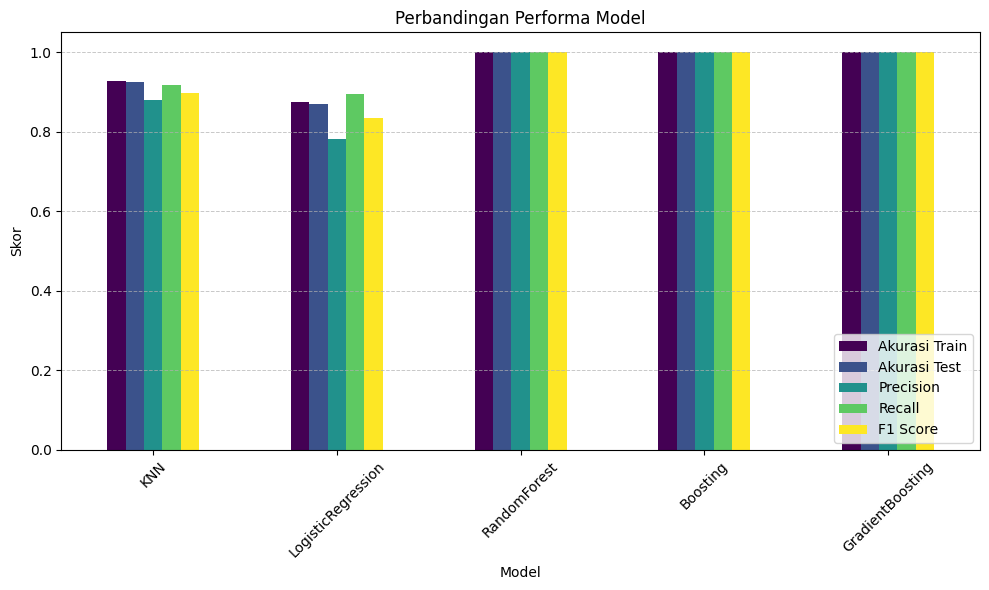

In [236]:
results.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


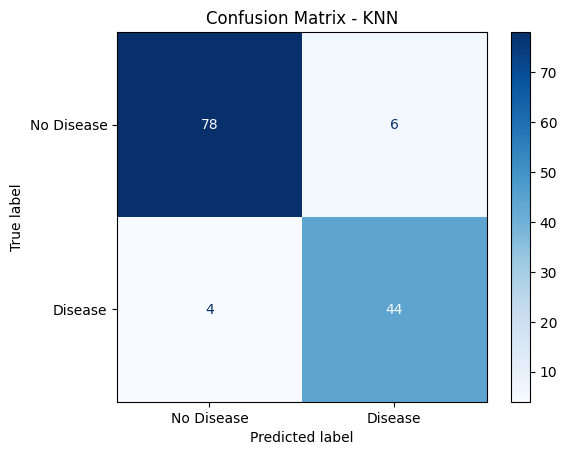

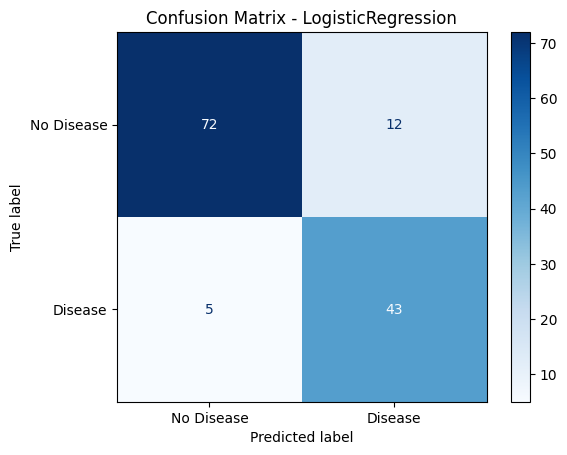

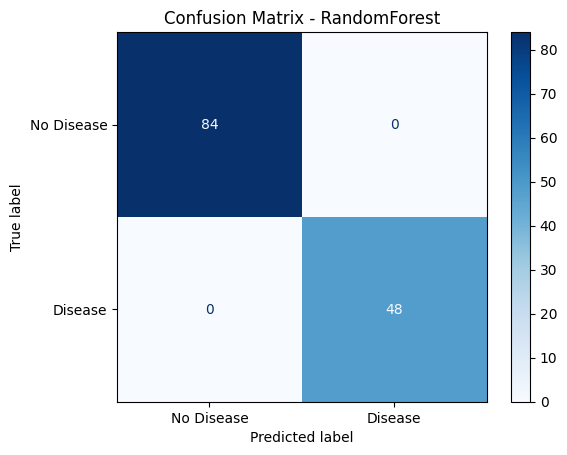

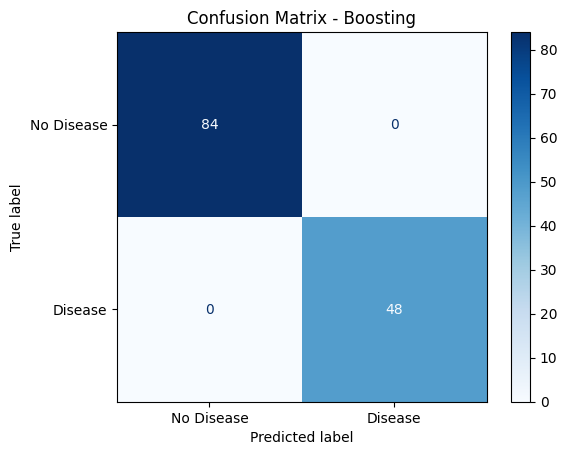

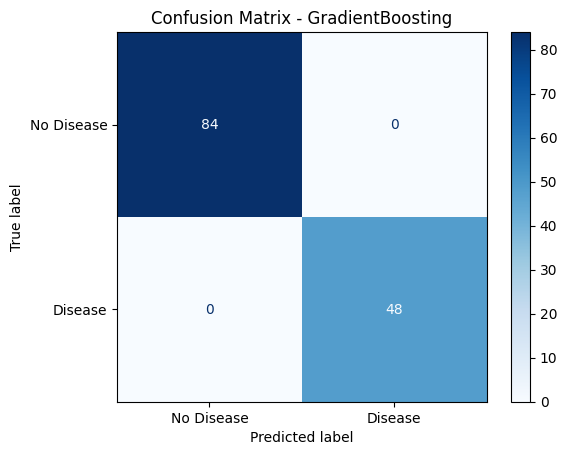

In [237]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_name, model in models.items():
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


1. **Logistic Regression**:
   - Akurasi pada test set mencapai 87%.
   - Precision dan recall menunjukkan performa yang seimbang, namun hasilnya lebih rendah dibandingkan model lain karena Logistic Regression cenderung kurang optimal untuk data yang tidak linier.

2. **K-Nearest Neighbors (KNN)**:
   - Akurasi pada test set mencapai 92%.
   - Precision yang lebih rendah (**78%**) menunjukkan model ini cenderung menghasilkan lebih banyak prediksi positif yang salah. Recall cukup tinggi (**89%**), yang berarti model ini cukup sensitif dalam mendeteksi kasus positif.

3. **Random Forest, AdaBoost, Gradient Boosting**:
   - Semua metrik (akurasi, precision, recall, F1 Score) mencapai 100%.
   - Model ini memberikan performa sempurna, baik pada training set maupun test set, menunjukkan kemampuan yang sangat baik dalam menangani data yang kompleks.

### Kesimpulan


**Gradient Boosting** dipilih sebagai model terbaik karena memberikan hasil evaluasi sempurna. Selain akurasi tinggi, model ini lebih fleksibel dalam menangani data yang kompleks.. Evaluasi menggunakan precision dan recall sangat relevan dalam konteks medis, di mana kesalahan prediksi dapat memiliki konsekuensi serius. Gradient Boosting memberikan hasil terbaik untuk kebutuhan ini dengan precision dan recall yang sempurna.

Dengan menggunakan kombinasi keempat metrik ini, performa model dapat dinilai lebih komprehensif sesuai dengan kebutuhan proyek, khususnya dalam kasus medis yang membutuhkan deteksi risiko kesehatan secara akurat.
